<a href="https://colab.research.google.com/github/kennethmark100/IS_4487_Tokyo/blob/main/Copy_of_day3_lab_retailer_intro_Kenny_Mark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 3 Lab, IS 4487

Outline

Repeat exercises from Lab 2, for practice, but with the *SuperStore Retail Orders* dataset

- Loading installed packages
- Inspect data
- Clean data
- Summarize data
- Explore plot types and search for insights

Please use the Gemini AI tool to get coding ideas.



# Notebook Instructions
- Remember to save a copy of the notebook in Drive so that you can save your changes.
- Complete the Assignment Tasks.
- When you are done revising this notebook save your changes to GitHub and upload the URL for the file to Canvas for the assignment.
- Some of these assignments ask you to do things we have not covered yet.  Use AI to come up with a solution.

# Load Libraries

➡️ Assignment Tasks
- Load Pandas

In [4]:
# your code goes here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load Data

In [5]:
ss = pd.read_csv("https://raw.githubusercontent.com/jefftwebb/is_4487_base/main/Labs/DataSets/superstore_retail_orders.csv")

# Summarize and Review Data

➡️ Assignment Tasks

- Describe or profile the dataframe

In [6]:
# Your code goes here
ss.head()


,order_id,order_date,order_year_month,customer_name,city,state_province,quantity,product_name,product_line,product_price
0,51188,2021-07-01,2021-07,Audrey Blanco,North Cherylmouth,NEW HAMPSHIRE,3.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
1,51187,2021-07-01,2021-07,Isaac Allen,Traceyland,WEST VIRGINIA,4.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
2,51199,2021-07-02,2021-07,Ian Morgan,Dylanberg,SOUTH DAKOTA,5.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
3,51241,2021-07-04,2021-07,Alexa Bell,Lake Tracytown,WISCONSIN,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
4,51297,2021-07-08,2021-07,Casey Diaz,Byrdchester,MISSISSIPPI,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99


In [7]:
ss.describe()

,order_id,quantity,product_price
count,56045.000000,56006.000000,56045.000000
mean,61668.066340,3.348498,6195.540505
std,7508.229651,422.646565,35784.727716
min,45079.000000,1.000000,2.290000
25%,55644.000000,1.000000,7.950000
50%,61869.000000,1.000000,475.600000
75%,68097.000000,2.000000,914.620000
max,74147.000000,100000.000000,235481.000000


In [8]:
ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56045 entries, 0 to 56044
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          56045 non-null  int64  
 1   order_date        56013 non-null  object 
 2   order_year_month  56013 non-null  object 
 3   customer_name     56045 non-null  object 
 4   city              55571 non-null  object 
 5   state_province    55571 non-null  object 
 6   quantity          56006 non-null  float64
 7   product_name      56045 non-null  object 
 8   product_line      56045 non-null  object 
 9   product_price     56045 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 4.3+ MB


# Prepare Data

➡️ Assignment Tasks
- Remove rows with empty (NULL) values
- Locate outliers in any of the variables.   Filter them out if they appear to be mistakes; keep them if they are exceptional cases.
- Create a new field: total_purchase. This should be product_price x quantity.

In [9]:
# Drop NAs
ss.dropna(inplace=True)
ss.info()
print(ss.count())

<class 'pandas.core.frame.DataFrame'>
Index: 55500 entries, 0 to 56044
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          55500 non-null  int64  
 1   order_date        55500 non-null  object 
 2   order_year_month  55500 non-null  object 
 3   customer_name     55500 non-null  object 
 4   city              55500 non-null  object 
 5   state_province    55500 non-null  object 
 6   quantity          55500 non-null  float64
 7   product_name      55500 non-null  object 
 8   product_line      55500 non-null  object 
 9   product_price     55500 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 4.7+ MB
order_id            55500
order_date          55500
order_year_month    55500
customer_name       55500
city                55500
state_province      55500
quantity            55500
product_name        55500
product_line        55500
product_price       55500
dtype: int

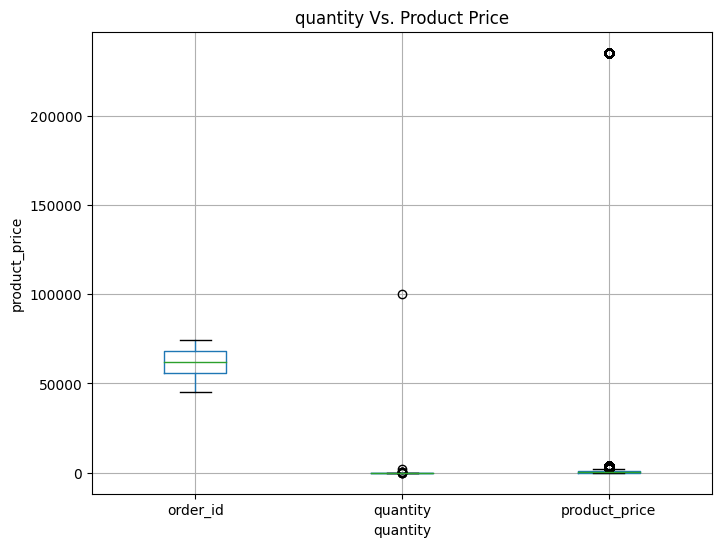

In [10]:
# Search for and filter outliers
ss.describe()
ss.columns


plt.figure(figsize=(8, 6))
ss.boxplot()
plt.title('quantity Vs. Product Price')
plt.ylabel('product_price')
plt.xlabel('quantity')
plt.grid(True)
plt.show()


In [11]:
ss_filtered = ss[(ss['product_price'] < 1000) & (ss['quantity'] < 100)]
ss_filtered.describe()

,order_id,quantity,product_price
count,43966.000000,43966.000000,43966.000000
mean,62517.056521,1.603762,274.936835
std,6803.753913,0.624387,333.916885
min,45080.000000,1.000000,2.290000
25%,56666.000000,1.000000,4.990000
50%,62508.500000,2.000000,48.070000
75%,68341.000000,2.000000,609.630000
max,74147.000000,5.000000,926.710000


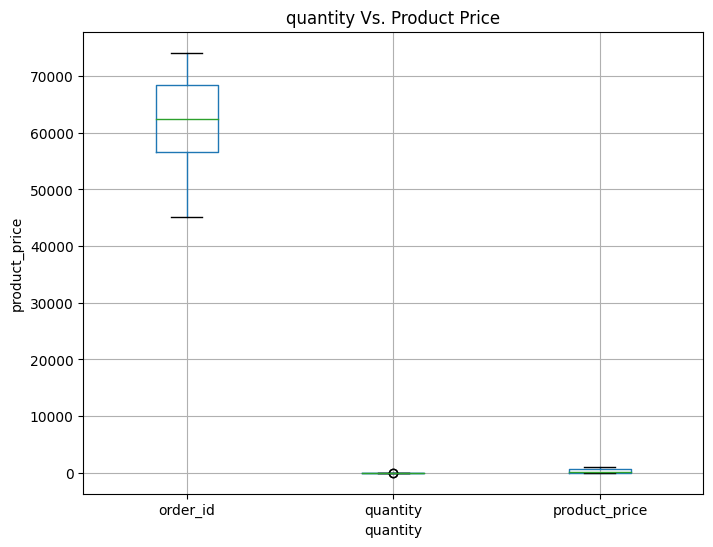

In [12]:
plt.figure(figsize=(8, 6))
ss_filtered.boxplot()
plt.title('quantity Vs. Product Price')
plt.ylabel('product_price')
plt.xlabel('quantity')
plt.grid(True)
plt.show()

In [13]:
# create total_purchase
ss_filtered['total_purchase'] = ss_filtered['product_price'] * ss_filtered['quantity']

<ipython-input-13-98d8c35610a2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ss_filtered['total_purchase'] = ss_filtered['product_price'] * ss_filtered['quantity']


Check that your cleaning worked

In [14]:
# your code goes here

ss_filtered.info()
ss_filtered.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 43966 entries, 0 to 56044
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          43966 non-null  int64  
 1   order_date        43966 non-null  object 
 2   order_year_month  43966 non-null  object 
 3   customer_name     43966 non-null  object 
 4   city              43966 non-null  object 
 5   state_province    43966 non-null  object 
 6   quantity          43966 non-null  float64
 7   product_name      43966 non-null  object 
 8   product_line      43966 non-null  object 
 9   product_price     43966 non-null  float64
 10  total_purchase    43966 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.0+ MB


,order_id,quantity,product_price,total_purchase
count,43966.000000,43966.000000,43966.000000,43966.000000
mean,62517.056521,1.603762,274.936835,362.868016
std,6803.753913,0.624387,333.916885,496.068629
min,45080.000000,1.000000,2.290000,2.290000
25%,56666.000000,1.000000,4.990000,9.980000
50%,62508.500000,2.000000,48.070000,48.070000
75%,68341.000000,2.000000,609.630000,609.630000
max,74147.000000,5.000000,926.710000,3249.950000


# Summarize Data

➡️ Assignment Tasks
- Calculate the average price per year-month
- Calculate the total revenue per year month

Does more cleaning need to be done? If so, do it and then recreate the above summary tables.

In [15]:
print(ss_filtered['order_date'].unique())

['2021-07-01' '2021-07-02' '2021-07-04' '2021-07-08' '2021-07-09'
 '2021-07-11' '2021-07-12' '2021-07-15' '2021-07-17' '2021-07-19'
 '2021-07-20' '2021-07-21' '2021-07-24' '2021-07-25' '2021-07-27'
 '2021-07-29' '2021-08-01' '2021-08-06' '2021-08-07' '2021-08-09'
 '2021-08-10' '2021-08-11' '2021-08-14' '2021-08-15' '2021-08-19'
 '2021-08-20' '2021-08-21' '2021-08-23' '2021-08-24' '2021-08-25'
 '2021-08-26' '2021-08-31' '2021-09-05' '2021-09-06' '2021-09-07'
 '2021-09-09' '2021-09-10' '2021-09-12' '2021-09-17' '2021-09-18'
 '2021-09-21' '2021-09-23' '2021-09-24' '2021-09-26' '2021-10-03'
 '2021-10-07' '2021-10-08' '2021-10-10' '2021-10-12' '2021-10-14'
 '2021-10-17' '2021-10-18' '2021-10-19' '2021-10-21' '2021-10-23'
 '2021-10-24' '2021-10-25' '2021-10-27' '2021-10-30' '2021-10-31'
 '2021-11-01' '2021-11-03' '2021-11-04' '2021-11-06' '2021-11-08'
 '2021-11-09' '2021-11-10' '2021-11-12' '2021-11-14' '2021-11-15'
 '2021-11-16' '2021-11-17' '2021-11-18' '2021-11-20' '2021-11-22'
 '2021-11-

In [ ]:
# Attempt to convert 'order_date' to datetime, handling errors
ss_filtered['order_date'] = pd.to_datetime(ss_filtered['order_date'], errors='coerce')

# Drop rows with missing values (including NaT in 'order_date')
ss_filtered = ss_filtered.dropna()

# Filter out rows with year 2029 and 1922
df_filtered = ss_filtered[(ss_filtered['order_date'].dt.year != 2029) & (ss_filtered['order_date'].dt.year != 1922)]

print("DataFrame after removing rows with year 2029, 1922 and invalid dates:")
print(df_filtered)

In [20]:
# Attempt to convert 'order_date' to datetime, handling errors
ss_filtered['order_date'] = pd.to_datetime(ss_filtered['order_date'], errors='coerce')

# Drop rows with missing values (including NaT in 'order_date')
ss_filtered = ss_filtered.dropna()

# Now you can safely extract the year
# df_filtered = ss_filtered[ss_filtered['order_date'].dt.year != 2029] & (ss_filtered['order_date'].dt.year != 1922)]
df_filtered = ss_filtered[(ss_filtered['order_date'].dt.year != 2029) & (ss_filtered['order_date'].dt.year != 1922)]

print("DataFrame after removing rows with year 2029 and invalid dates:")
print(ss_filtered)

DataFrame after removing rows with year 2029 and invalid dates:
       order_id order_date order_year_month     customer_name  \
0         51188 2021-07-01          2021-07     Audrey Blanco   
1         51187 2021-07-01          2021-07       Isaac Allen   
2         51199 2021-07-02          2021-07        Ian Morgan   
3         51241 2021-07-04          2021-07        Alexa Bell   
4         51297 2021-07-08          2021-07        Casey Diaz   
...         ...        ...              ...               ...   
56040     74084 2022-06-29          2022-06        Ian Rogers   
56041     74062 2022-06-29          2022-06   Marcus Anderson   
56042     74065 2022-06-29          2022-06  Nathaniel Howard   
56043     74038 2022-06-29          2022-06        Robin Sanz   
56044     74110 2022-06-30          2022-06   Mallory Jimenez   

                    city             state_province  quantity  \
0      North Cherylmouth  NEW HAMPSHIRE                   3.0   
1             Traceyland 

In [22]:
print(df_filtered['order_date'].unique())

<DatetimeArray>
['2021-07-01 00:00:00', '2021-07-02 00:00:00', '2021-07-04 00:00:00',
 '2021-07-08 00:00:00', '2021-07-09 00:00:00', '2021-07-11 00:00:00',
 '2021-07-12 00:00:00', '2021-07-15 00:00:00', '2021-07-17 00:00:00',
 '2021-07-19 00:00:00',
 ...
 '2020-07-06 00:00:00', '2020-07-20 00:00:00', '2020-09-01 00:00:00',
 '2020-09-16 00:00:00', '2020-09-28 00:00:00', '2020-10-14 00:00:00',
 '2020-10-18 00:00:00', '2021-03-03 00:00:00', '2021-05-07 00:00:00',
 '2021-05-20 00:00:00']
Length: 732, dtype: datetime64[ns]


In [21]:
# average price

# average_price = ss_filtered['product_price'].mean()
# print(average_price)

# average price

# average_price = ss_filtered['product_price'].mean()
# print(average_price)



df_filtered['order_date'] = pd.to_datetime(df_filtered['order_date']) # Changed 'ss_filered' to 'ss_filtered'

# Extract year and month into separate columns
df_filtered['year'] = df_filtered['order_date'].dt.year
df_filtered['month'] = df_filtered['order_date'].dt.month

# Group by year and month, calculate average price
average_price_per_month = df_filtered.groupby(['year', 'month'])['product_price'].mean()

print("Average price per year-month:")
print(average_price_per_month)

Average price per year-month:
year  month
2020  1        630.090000
      2        630.090000
      3        630.090000
      4        630.090000
      5        630.090000
      6        630.090000
      7        630.090000
      8        630.090000
      9        630.090000
      10       630.090000
      11       630.090000
      12       630.090000
2021  1        630.090000
      2        630.090000
      3        630.090000
      4        630.090000
      5        630.090000
      6        630.090000
      7        292.586824
      8        262.103689
      9        260.358474
      10       255.262519
      11       272.995200
      12       277.175381
2022  1        267.374479
      2        259.978323
      3        270.613324
      4        265.983582
      5        284.589149
      6        270.780292
Name: product_price, dtype: float64


<ipython-input-21-3a28c7540fa2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['order_date'] = pd.to_datetime(df_filtered['order_date']) # Changed 'ss_filered' to 'ss_filtered'
<ipython-input-21-3a28c7540fa2>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['year'] = df_filtered['order_date'].dt.year
<ipython-input-21-3a28c7540fa2>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [27]:
# total revenue
df_filtered['revenue'] = df_filtered['product_price'] * df_filtered['quantity']

print(df_filtered['revenue'].unique())


[1.94997e+03 2.59996e+03 3.24995e+03 6.49990e+02 5.39990e+02 6.86700e+02
 5.64990e+02 6.93440e+02 6.69020e+02 2.07768e+03 1.38512e+03 6.92560e+02
 5.85240e+02 1.21926e+03 1.82889e+03 6.09630e+02 4.29800e+01 2.14900e+01
 6.44700e+01 9.26710e+02 5.48770e+02 1.09754e+03 1.64631e+03 1.24388e+03
 6.21940e+02 1.86582e+03 4.99000e+00 9.98000e+00 1.49700e+01 7.98000e+00
 3.99000e+00 1.19700e+01 5.39900e+01 5.49900e+01 1.59000e+02 1.58536e+03
 7.92680e+02 2.37804e+03 7.95000e+00 1.59000e+01 2.38500e+01 1.20000e+02
 1.79800e+01 8.99000e+00 2.69700e+01 6.87000e+00 4.58000e+00 2.29000e+00
 1.99800e+01 2.99700e+01 9.99000e+00 6.99900e+01 6.35000e+01 6.30090e+02
 4.80700e+01 1.72800e+01 8.64000e+00 2.59200e+01 4.75600e+02 9.14620e+02]


<ipython-input-27-9aa71a4132ae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['revenue'] = df_filtered['product_price'] * df_filtered['quantity']


# Plot Data

➡️ Assignment Tasks
- Produce two plots that show patterns or relationships in the data.
- Interpret these patterns for potential value to the business.  

<ipython-input-29-58bf8d5e2974>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='year', y='revenue', data=df_filtered, palette='viridis')


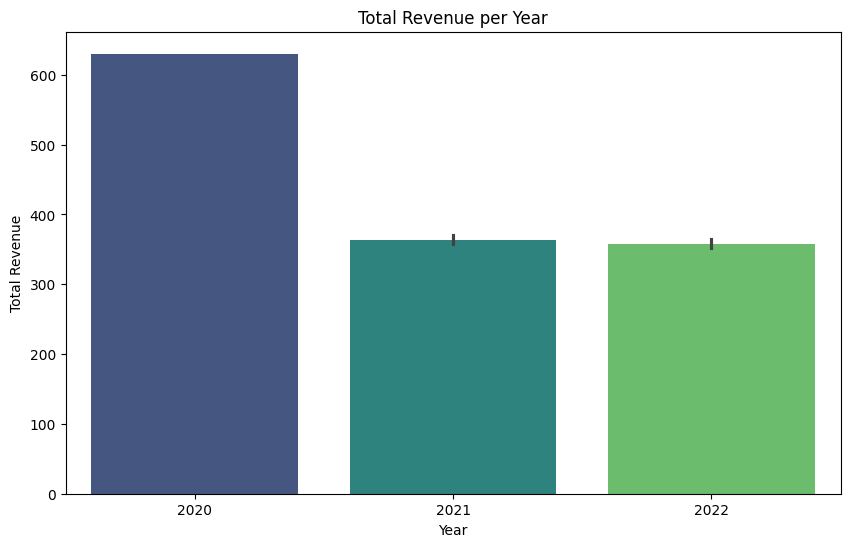

In [29]:
# Your code goes here.  Plot 1
plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='revenue', data=df_filtered, palette='viridis')
plt.title('Total Revenue per Year')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.show()

<ipython-input-30-fee19d3d5e13>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month', y='revenue', data=df_filtered, palette='viridis')


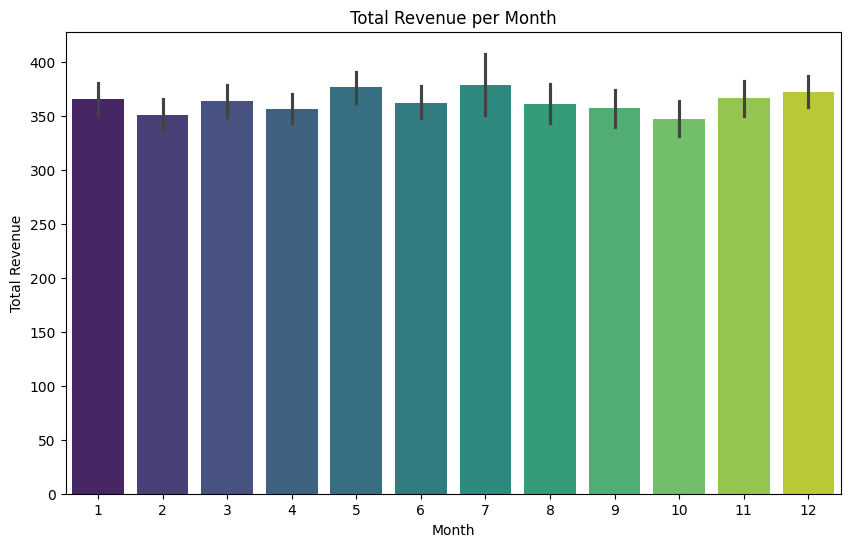

In [30]:
# Your code goes here.  Plot 2

plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='revenue', data=df_filtered, palette='viridis')
plt.title('Total Revenue per Month')
plt. xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()

Make an interpretive comment.

During the year 2020, the business generated the most revenue. We can further gather stats on why the business did better during this year than others. For the second graph, Months are seen to have a low impact on revenue which is good to know for marketing and other how time affects demand.
